In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'precip_monthly.nc'
data = xr.open_mfdataset(datafile).compute()
precip = data.precip
nsize = precip.shape
precip

<xarray.DataArray 'precip' (time: 480, latitude: 60, longitude: 180)> Size: 21MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2020-12-01
  * latitude   (latitude) int64 480B -60 -58 -56 -54 -52 -50 ... 50 52 54 56 58
  * longitude  (longitude) int64 1kB -180 -178 -176 -174 ... 172 174 176 178
Attributes:
    units:               mm/month
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards center InfraRed Precipitation with S...
    time_step:           month
    geostatial_lat_min:  -60
    geostatial_lat_max:  60
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [4]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'nino34.nc'
data = xr.open_mfdataset(datafile).compute()
nino34 = data.sst
nino34

<xarray.DataArray 'sst' (time: 480)> Size: 4kB
array([ 2.38054769e-02,  1.31836367e-02, -6.74403544e-02, -1.52219868e-01,
       -2.30222843e-01, -3.37109472e-01, -3.38514769e-01, -3.21563511e-01,
       -2.95003447e-01, -2.43904087e-01, -1.98085979e-01, -1.92673126e-01,
       -1.17717818e-01,  9.84096172e-04, -5.70701624e-04,  7.62762569e-02,
        2.07560090e-01,  3.54326989e-01,  4.53075484e-01,  5.76310954e-01,
        7.01169839e-01,  9.41485736e-01,  1.23769405e+00,  1.50917334e+00,
        1.86016483e+00,  2.16879420e+00,  2.24829584e+00,  2.11823004e+00,
        1.93330052e+00,  1.69326312e+00,  1.35516610e+00,  9.67116500e-01,
        6.47856668e-01,  3.40054828e-01, -7.88970259e-02, -4.50328242e-01,
       -6.48588688e-01, -7.45129914e-01, -6.89175765e-01, -5.72470121e-01,
       -4.44344165e-01, -3.69652443e-01, -3.97197826e-01, -4.43231492e-01,
       -3.83511087e-01, -3.31211814e-01, -3.28495773e-01, -3.89765889e-01,
       -5.69387659e-01, -7.64390850e-01, -8.49390460e-01, -8.80830201e-01,
       -8.71019877e-01, -7.91397799e-01, -7.24410736e-01, -7.10323476e-01,
       -6.58029670e-01, -5.79148659e-01, -4.80563501e-01, -3.77710152e-01,
       -3.24552394e-01, -3.57571551e-01, -3.64974271e-01, -3.58543505e-01,
       -3.41962950e-01, -3.48702687e-01, -2.59137528e-01, -1.25044517e-01,
        2.66562566e-02,  1.82101070e-01,  4.38140349e-01,  6.94124622e-01,
        9.26039858e-01,  1.07465563e+00,  1.18735198e+00,  1.21439346e+00,
        1.13642072e+00,  1.05525906e+00,  1.03163659e+00,  1.08095620e+00,
...
       -3.29540632e-01, -2.18846859e-01, -5.59449932e-02,  7.19213698e-02,
        1.27974619e-01,  1.52534672e-01,  1.68377773e-01,  2.68518696e-01,
        4.10176117e-01,  5.07837589e-01,  5.31369461e-01,  5.32771119e-01,
        5.31731105e-01,  5.91854237e-01,  7.41432730e-01,  9.61974012e-01,
        1.25612582e+00,  1.54041134e+00,  1.81873466e+00,  2.12052329e+00,
        2.34787516e+00,  2.46290684e+00,  2.46555603e+00,  2.31068222e+00,
        1.95857694e+00,  1.50779547e+00,  1.01083112e+00,  4.85584217e-01,
        5.48492506e-02, -2.54865428e-01, -4.72898154e-01, -6.24337540e-01,
       -6.44086727e-01, -6.30447427e-01, -5.43174088e-01, -3.99532752e-01,
       -2.01409507e-01, -1.45103987e-02,  1.55997328e-01,  2.42208118e-01,
        2.11671073e-01,  6.93736006e-02, -1.23606107e-01, -3.87246130e-01,
       -6.51524319e-01, -8.29572756e-01, -9.07579677e-01, -9.62509243e-01,
       -8.63583662e-01, -6.86261730e-01, -4.60607795e-01, -2.58732006e-01,
       -7.08388724e-02,  1.11721162e-01,  3.24634463e-01,  4.91474963e-01,
        6.28204716e-01,  7.23951898e-01,  7.63177332e-01,  7.33819186e-01,
        6.83279450e-01,  6.33810793e-01,  6.12539574e-01,  5.56986729e-01,
        4.11312824e-01,  2.78910818e-01,  2.56479071e-01,  2.66442021e-01,
        2.86596668e-01,  3.84156811e-01,  4.41670728e-01,  4.30235662e-01,
        4.04405674e-01,  2.62215406e-01,  9.27300142e-02, -2.32130206e-02,
       -2.29591664e-01, -4.83171662e-01, -6.86792652e-01, -9.07095047e-01])
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2020-12-15

In [5]:
x1 = nino34.sel(time=nino34.time.dt.month.isin([8,9,10,11,12]))
x2 = precip.sel(time=precip.time.dt.month.isin([8,9,10,11,12]))
x2

<xarray.DataArray 'precip' (time: 200, latitude: 60, longitude: 180)> Size: 9MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1981-08-01 1981-09-01 ... 2020-12-01
  * latitude   (latitude) int64 480B -60 -58 -56 -54 -52 -50 ... 50 52 54 56 58
  * longitude  (longitude) int64 1kB -180 -178 -176 -174 ... 172 174 176 178
Attributes:
    units:               mm/month
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards center InfraRed Precipitation with S...
    time_step:           month
    geostatial_lat_min:  -60
    geostatial_lat_max:  60
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [6]:
r_xy = np.zeros([nsize[1],nsize[2]])
p_val = np.zeros([nsize[1],nsize[2]])
for iy in range(nsize[1]):
    for ix in range(nsize[2]):
        r_xy[iy,ix], p_val[iy,ix] = stats.pearsonr(x2.values[:,iy,ix], x1.values)
print(r_xy.shape,p_val.shape)

(60, 180) (60, 180)


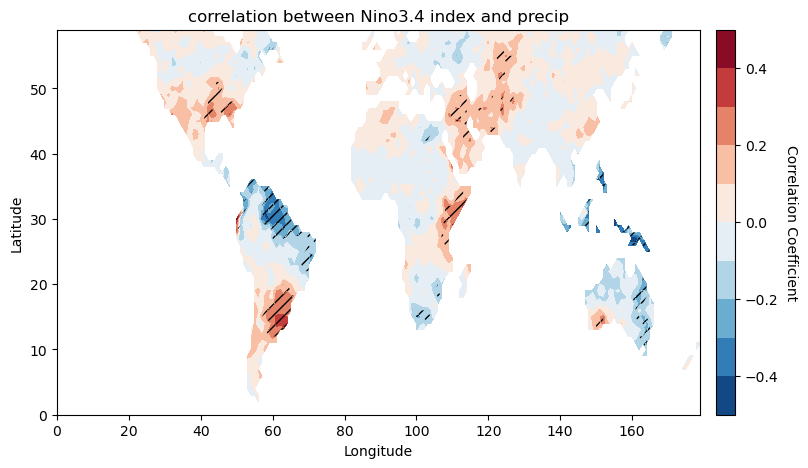

In [7]:
# plot the correlation map
figure = plt.figure(figsize=(10,5))
ax = figure.add_subplot(1,1,1)

# First we set a significance level alpha and compare p-values with the level
alpha = 0.05
# Then we compare p-values with alpha. We copy the correlation matrix to 
# a new variable named r_xy_p. 
# Where p_val larger than alpha, it is NOT statistically significant at that significance level,
# and we set these non-significant data to NaN. 
r_xy_p = np.copy(r_xy)
r_xy_p[np.where(p_val>0.05)] = np.nan

im = ax.contourf(r_xy, cmap='RdBu_r', levels=np.arange(-0.5,0.6,0.1))
cbar = figure.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
im = ax.contourf(r_xy_p, cmap='RdBu_r', hatches=['///'], levels=np.arange(-0.5,0.6,0.1))

cbar.ax.set_ylabel("Correlation Coefficient", rotation=-90, va="bottom")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("correlation between Nino3.4 index and precip")

plt.show()